# Data cleaning and exploration

In [29]:
# Dataset download

import kagglehub

path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [30]:
# Usual imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from time import perf_counter

In [31]:
# Imports for this module
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import pydot


In [32]:
# Data exploration
df = pd.read_csv(path+'/train.csv')
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes                455
satisfaction                              2
dtype: int64

In [33]:
# Data cleaning
df = df.dropna()
df.drop_duplicates()


Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [34]:
# drop id and Unnamed:0 colums
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [35]:
# Onehot encode categorical values

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Customer Type'], drop_first=True)
df = pd.get_dummies(df, columns=['Type of Travel'], drop_first=True)
df = pd.get_dummies(df, columns=['Class'], drop_first=True)
df = pd.get_dummies(df, columns=['satisfaction'], drop_first=True)




(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Flight Distance'),
  Text(0, 2.5, 'Inflight wifi service'),
  Text(0, 3.5, 'Departure/Arrival time convenient'),
  Text(0, 4.5, 'Ease of Online booking'),
  Text(0, 5.5, 'Gate location'),
  Text(0, 6.5, 'Food and drink'),
  Text(0, 7.5, 'Online boarding'),
  Text(0, 8.5, 'Seat comfort'),
  Text(0, 9.5, 'Inflight entertainment'),
  Text(0, 10.5, 'On-board service'),
  Text(0, 11.5, 'Leg room service'),
  Text(0, 12.5, 'Baggage handling'),
  Text(0, 13.5, 'Checkin service'),
  Text(0, 14.5, 'Inflight service'),
  Text(0, 15.5, 'Cleanliness'),
  Text(0, 16.5, 'Departure Delay in Minutes'),
  Text(0, 17.5, 'Arrival Delay in Minutes'),
  Text(0, 18.5, 'Gender_Male'),
  Text(0, 19.5, 'Customer Type_disloyal Customer'),
  Text(0, 20.5, 'Type of Travel_Personal Travel'),
  Text(0, 21.5, '

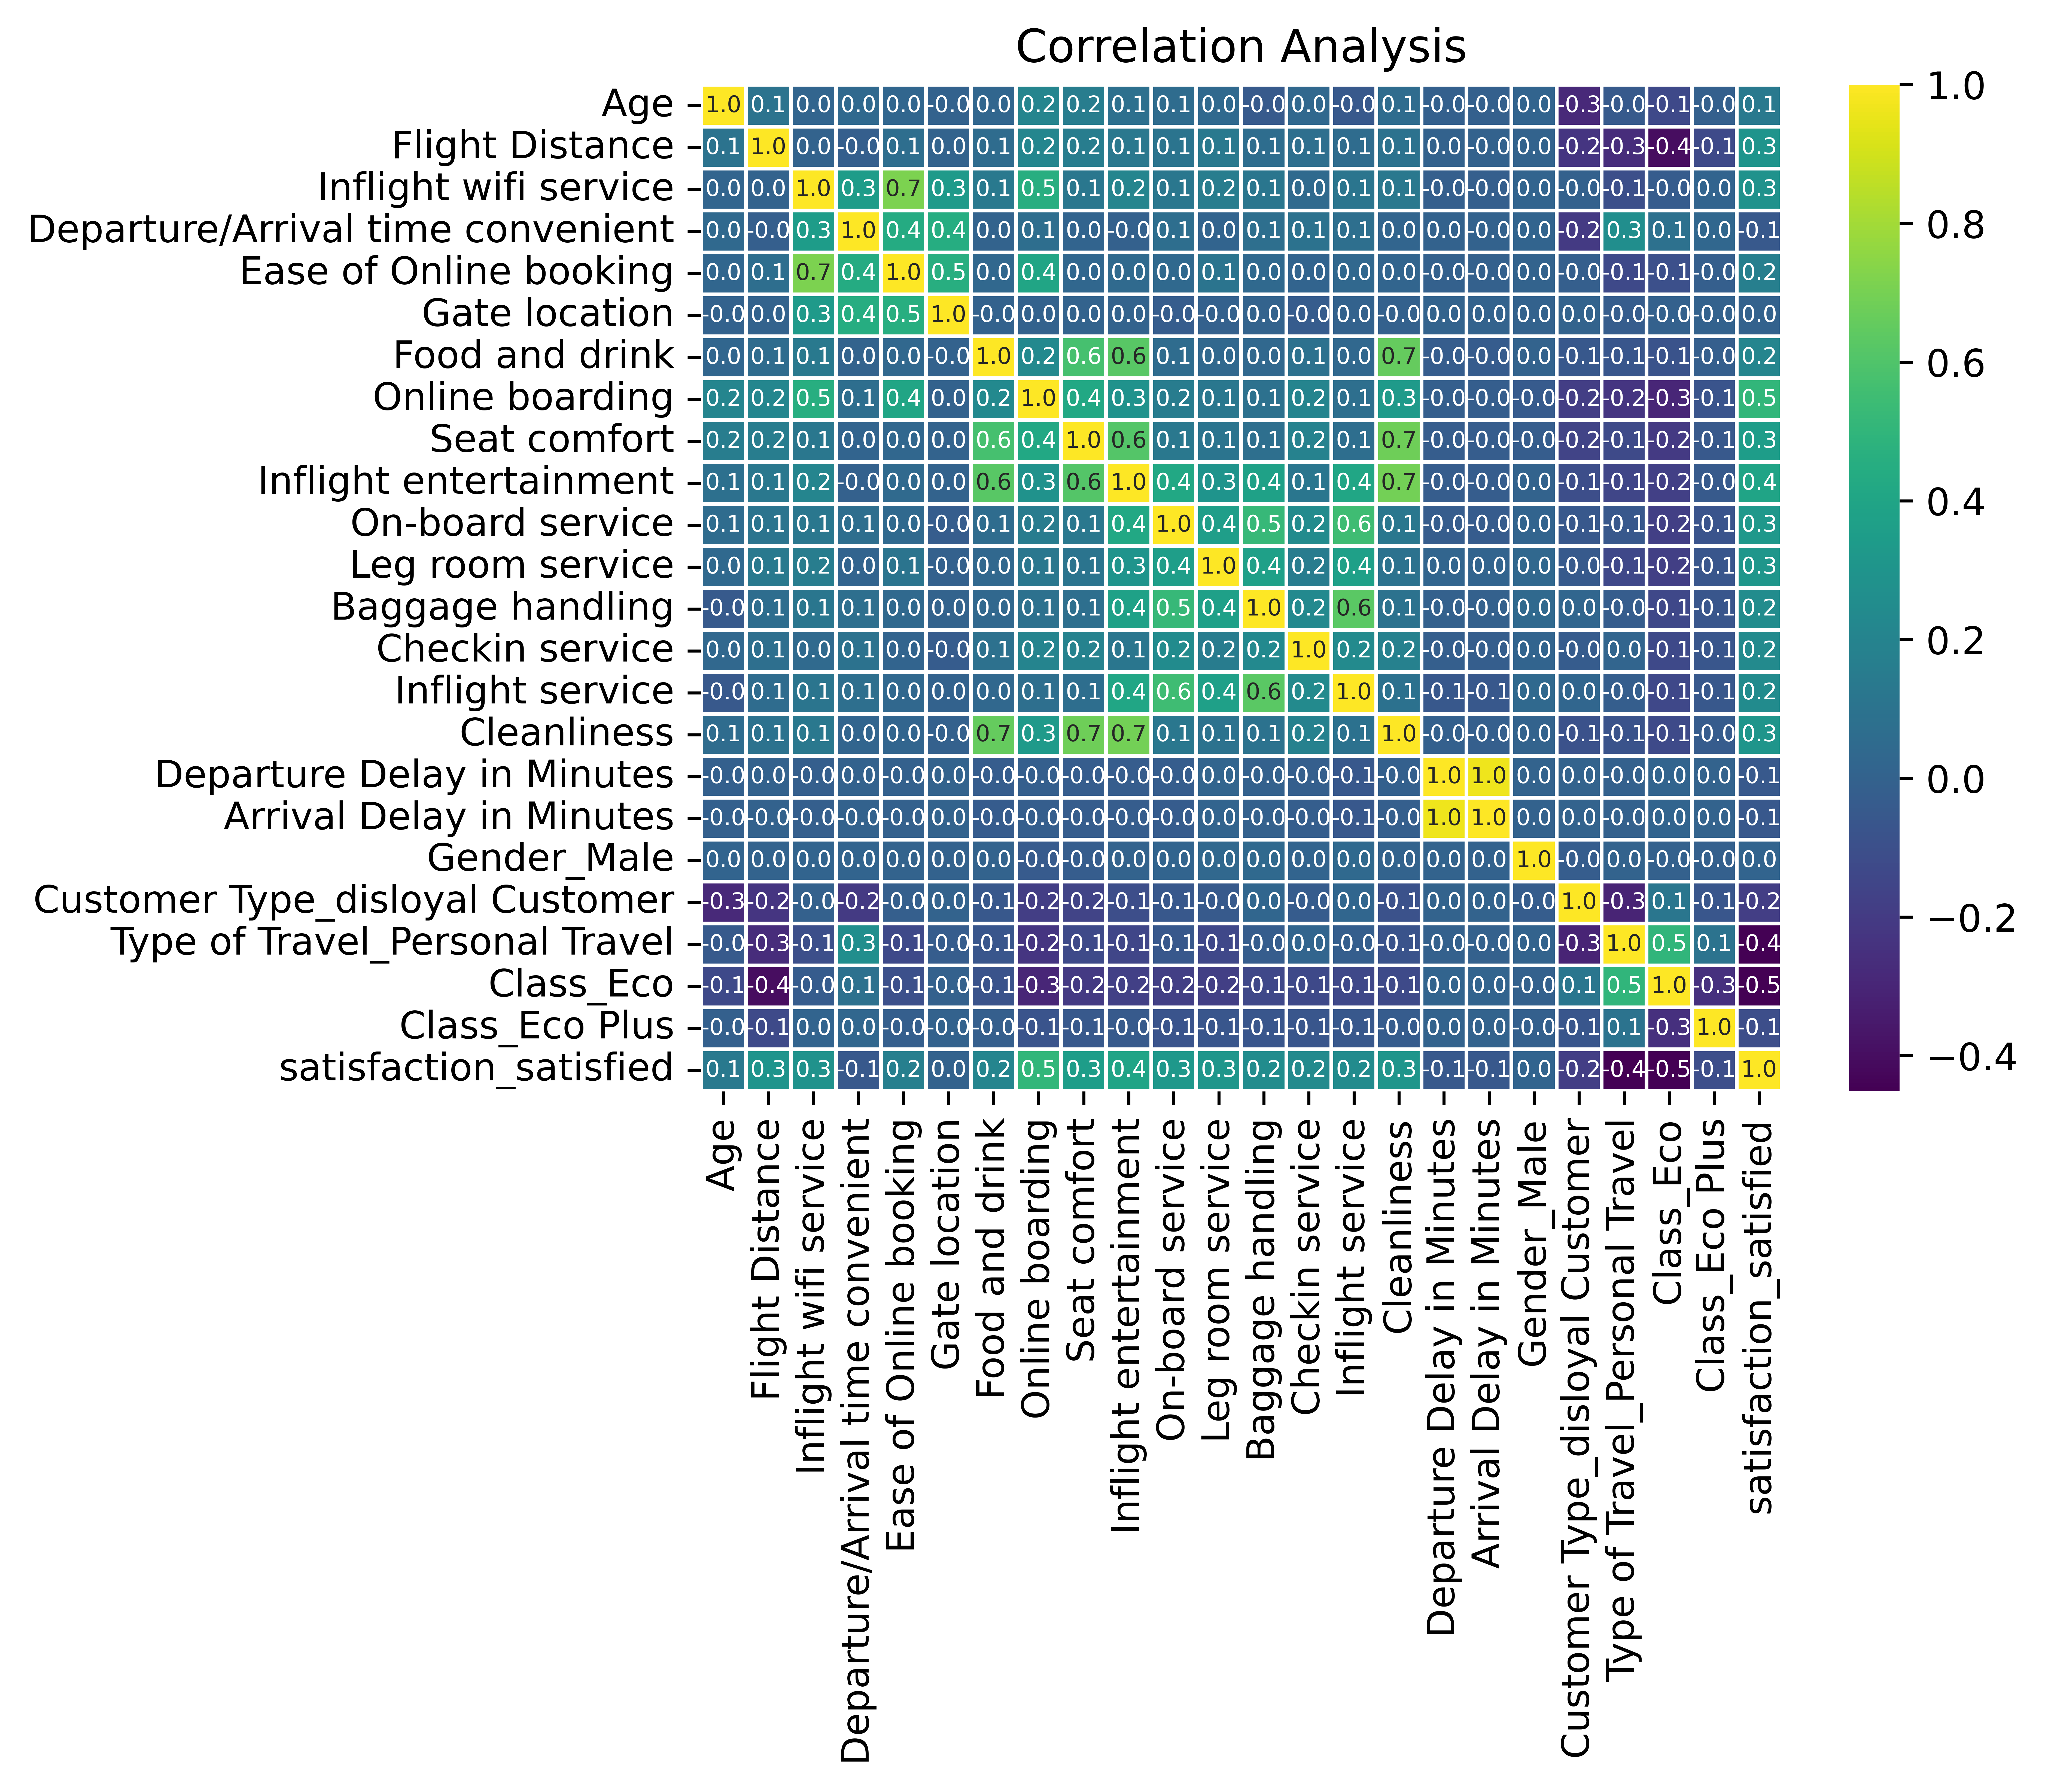

In [36]:
plt.figure(dpi=1000)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(), annot=True, lw=1, linecolor='white', cmap='viridis',
            annot_kws={"size": 6}, fmt=".1f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [37]:
# Selecting x and y
x = df.loc[:, df.columns != 'satisfaction_satisfied']
#x = x.values.reshape((-1, 1))
print(x.shape)

y = df.loc[:, 'satisfaction_satisfied']

print(y)

(103594, 23)
0         False
1         False
2          True
3         False
4          True
          ...  
103899    False
103900     True
103901    False
103902    False
103903    False
Name: satisfaction_satisfied, Length: 103594, dtype: bool


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Dimension Reduction


# PCA

In [39]:
from sklearn.decomposition import PCA
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


# Clustering

## KMeans

### Elbow Method

Text(0, 0.5, 'Sum of Squared Errors (SSE)')

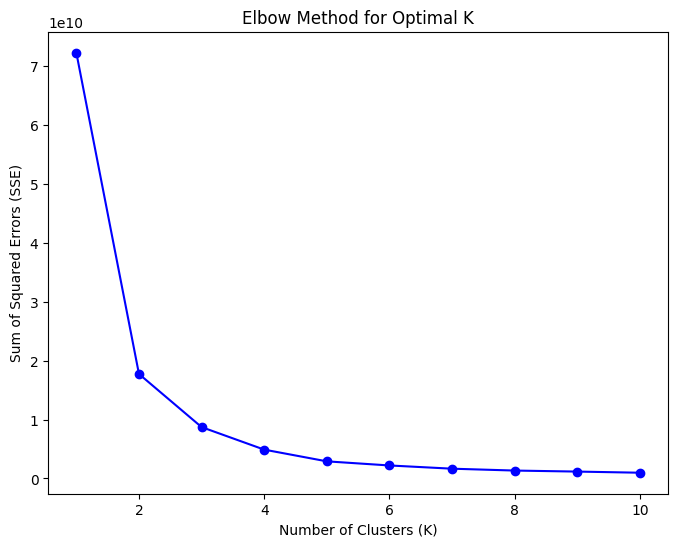

In [42]:
SSE = []
for i in range(10):
    kmeans = KMeans(n_clusters= i+1, random_state=0, init='k-means++')
    kmeans_labels = kmeans.fit_predict(x_train_pca)
    SSE.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), SSE, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")

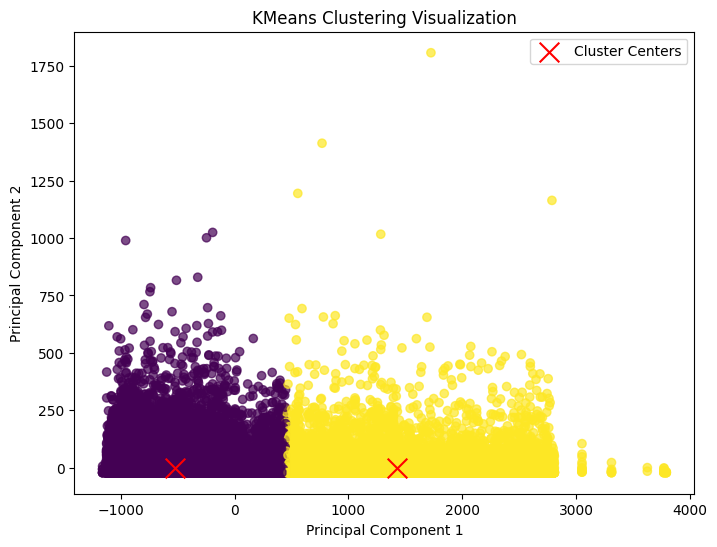

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
kmeans_labels = kmeans.fit_predict(x_train_pca)

plt.figure(figsize=(8, 6))

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

plt.title("KMeans Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## AgglomerativeClustering (only 20k samples)

### Sample of 20k records

In [48]:
#sample of 20k from df

df20k_sample = df.sample(n=20000, random_state=0)
print(df20k_sample.shape)
# Selecting x and y
x_sample = df20k_sample.loc[:, df.columns != 'satisfaction_satisfied']
#x_sample = x.values.reshape((-1, 1))
print(x.shape)

y_sample = df20k_sample.loc[:, 'satisfaction_satisfied']

print(y.shape)

x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(x_sample, y_sample, test_size=0.3, random_state=0)

(20000, 24)
(103594, 23)
(103594,)


### Dimension Reduction

In [49]:
pca = PCA(n_components = 5)
x_train_pca_sample = pca.fit_transform(x_train_sample)
x_test_pca_sample = pca.transform(x_test_sample)

### Determine number of clusters

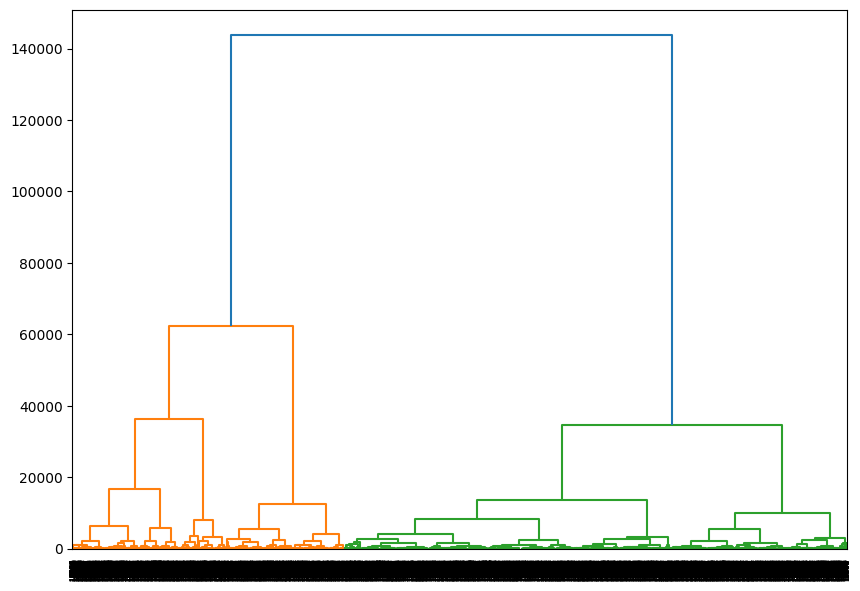

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(x_train_pca_sample, 'ward')

labelList = range(1,11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Clustering

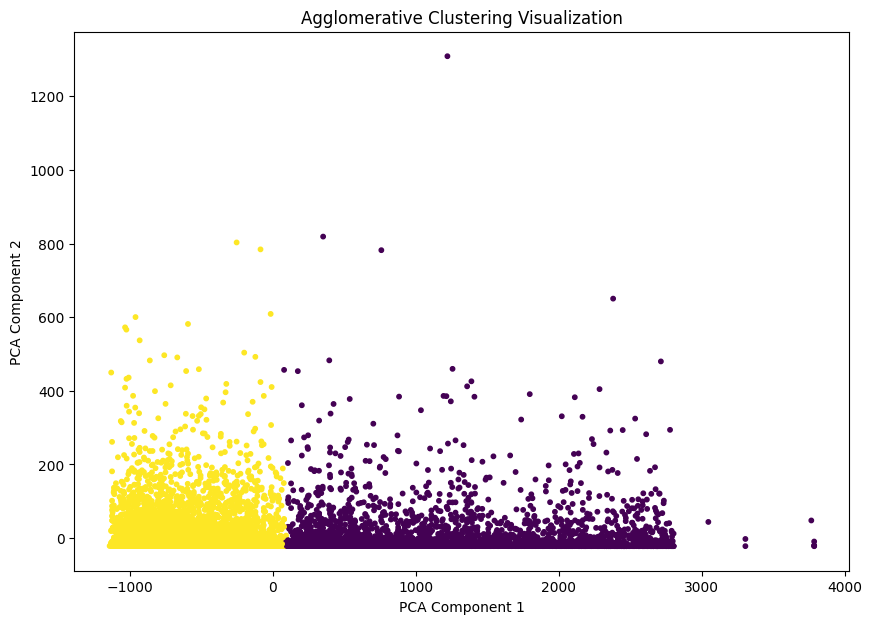

In [57]:
from sklearn.cluster import AgglomerativeClustering

#reduce to 2D for visualization
pca = PCA(n_components=2)
x_train_pca_sample = pca.fit_transform(x_train_pca_sample)

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(x_train_pca_sample)

plt.figure(figsize=(10, 7))
plt.scatter(
    x_train_pca_sample[:, 0],
    x_train_pca_sample[:, 1],
    c=agg_labels,  # Cluster labels as colors
    s=10  # Marker size
)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()